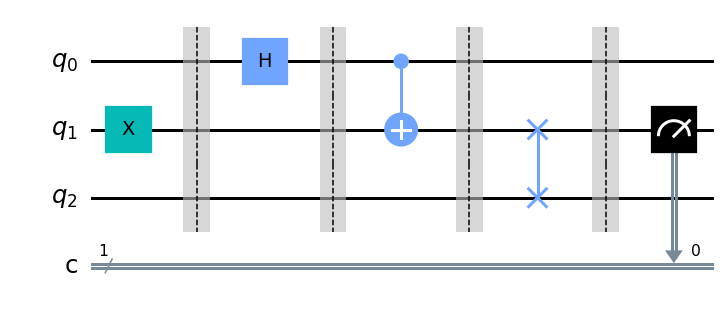

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

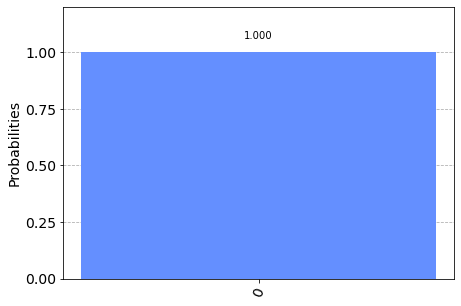

In [1]:
# quantum_circuit1.ipynb

# Cell 1

import matplotlib.pyplot as plt
import numpy as np
import qiskit
from IPython.display import Math
from qiskit import (
    Aer,
    ClassicalRegister,
    QuantumCircuit,
    QuantumRegister,
    assemble,
    execute,
)
from qiskit.quantum_info import Statevector
from qiskit.visualization import (
    array_to_latex,
    plot_bloch_multivector,
    plot_histogram,
    plot_state_qsphere,
)

backend = Aer.get_backend("aer_simulator")
qc = QuantumCircuit(3, 1)

#apply x gate on qubit 1
qc.x(1)
qc.save_statevector("sv1")
#apply hadamard gate on qubit 0
qc.h(0)
qc.save_statevector("sv2")
#apply controlled x gate 
qc.cx(0,1)
qc.save_statevector("sv3")
#apply swap gate
qc.swap(1,2)

qc.save_statevector()
qc.measure(1, 0)

result = execute(qc, backend, shots=10_000).result()
counts = result.get_counts()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.get_statevector()

display(qc.draw(output="mpl", scale=1.5))

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))
display(array_to_latex(sv3, prefix="\\text{Statevector 3} = "))
display(array_to_latex(sv4, prefix="\\text{Statevector 4} = "))

plot_histogram(counts)